In [21]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import math

In [2]:
# columns: 1=p, 2=H2_mr, 3=CH4_mr, 4=CO_mr
archean_abiotic_data = pd.read_csv('../../DATA/H2CH4COmr_abiotic_archean_Earth.csv', sep='\t', header=None, skiprows=1)
archean_bio_data = pd.read_csv('../../DATA/H2CH4COmr_bio_archean_Earth.csv', sep='\t', header=None, skiprows=1)
kdata = pd.read_csv('../../DATA/kharecha_data.csv', sep=',', header=None, skiprows=1)


In [3]:
kch4x, kch4y, kh2x, kh2y, kcox, kcoy = np.array(kdata[0][1:]), np.array(kdata[1][1:]), kdata[2][1:20], kdata[3][1:20], kdata[4][1:28], kdata[5][1:28]


In [4]:
def Extract(output):
    data = [np.array(output[1]),
            np.array(output[2]),
            np.array(output[3]),
            np.array(output[4])]
    for i in data:
        [float(j) for j in i]
        
    for i in data:    
        i.tolist().reverse()
    
    p = data[0]
    h2_mr = data[1]
    ch4_mr = data[2]
    co_mr = data[3]
    
    z = []
    for i in p:
        z.append(((5e3)*math.log(1e5/i))/1e3)
        
    return z, h2_mr, ch4_mr, co_mr
    

In [5]:
ar_abiotic_z, ar_abiotic_H2, ar_abiotic_CH4, ar_abiotic_CO = Extract(archean_abiotic_data)[0], Extract(archean_abiotic_data)[1], Extract(archean_abiotic_data)[2], Extract(archean_abiotic_data)[3]
ar_bio_z, ar_bio_H2, ar_bio_CH4, ar_bio_CO = Extract(archean_bio_data)[0], Extract(archean_bio_data)[1], Extract(archean_bio_data)[2], Extract(archean_bio_data)[3]



In [6]:
kch4x = kch4x.astype(np.float)
kch4y = kch4y.astype(np.float)
kh2x = kh2x.astype(np.float)
kh2y = kh2y.astype(np.float)
kcox = kcox.astype(np.float)
kcoy = kcoy.astype(np.float)

<ipython-input-6-39847aee6e61>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  kch4x = kch4x.astype(np.float)
<ipython-input-6-39847aee6e61>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  kch4y = kch4y.astype(np.float)
<ipython-input-6-39847aee6e61>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To sil

[]

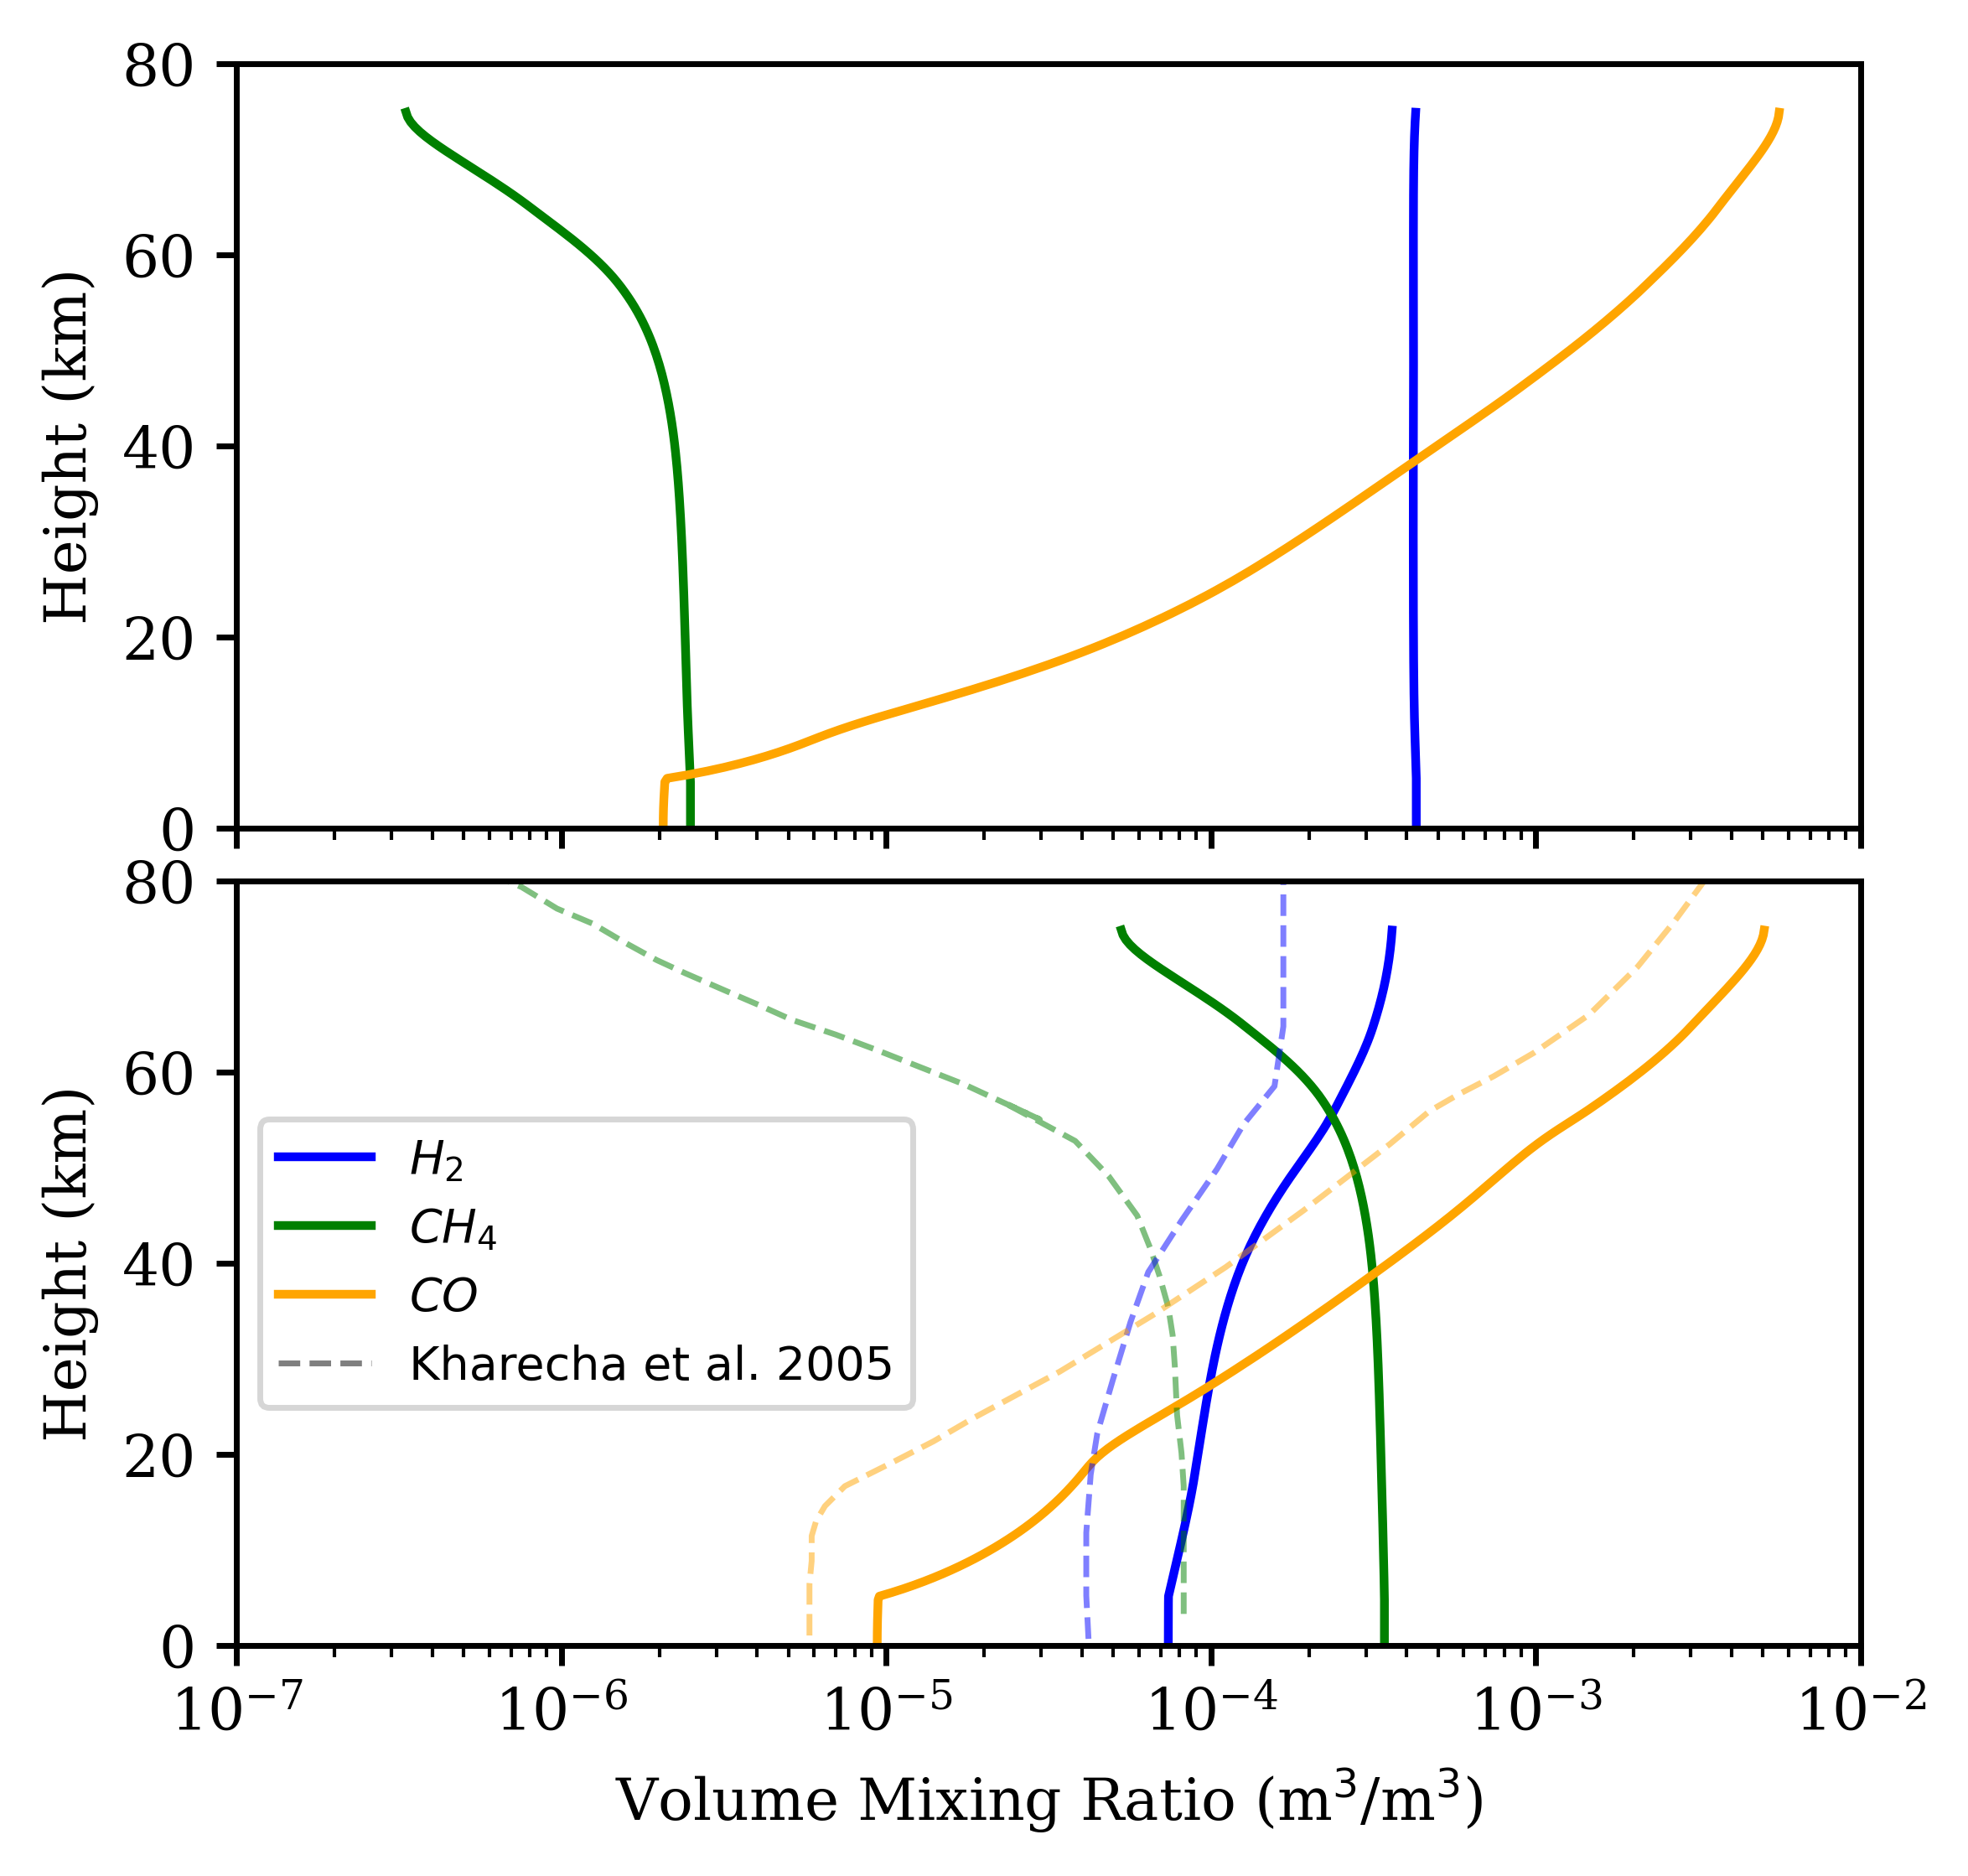

In [55]:
fig = plt.figure(figsize=(5, 4), dpi= 500, facecolor='w', edgecolor='k')
fig.set_figheight(5)
 
# set width of each subplot as 8
fig.set_figwidth(5)

# create grid for different subplots
grid = gridspec.GridSpec(ncols=1, nrows=2,
                         hspace=0.07, height_ratios=[1, 1])

ax1 = fig.add_subplot(grid[0])
ax2 = fig.add_subplot(grid[1],sharex=ax1)
plt.setp(ax1.get_xticklabels(), visible=False)


ax2.set_xscale('log')
ax2.set_xlim(xmin=1e-7,xmax=1e-2)
ax1.plot(ar_abiotic_H2,ar_abiotic_z, label=r'$H_2$',color='blue',linewidth=1.5)
ax1.plot(ar_abiotic_CH4,ar_abiotic_z, label=r'$CH_4$',color='green',linewidth=1.5)
ax1.plot(ar_abiotic_CO,ar_abiotic_z, label=r'$CO$',color='orange',linewidth=1.5)

ax2.plot(ar_bio_H2,ar_bio_z,color='blue', label=r'$H_2$',linewidth=1.5)
ax2.plot(ar_bio_CH4,ar_bio_z,color='green', label=r'$CH_4$',linewidth=1.5)
ax2.plot(ar_bio_CO,ar_bio_z,color='orange', label=r'$CO$',linewidth=1.5)
ax2.plot(kch4x,kch4y,color='green',linewidth=1,linestyle='dashed',alpha=0.5)
ax2.plot(kh2x,kh2y,color='blue', linewidth=1,linestyle='dashed',alpha = 0.5)
ax2.plot(kcox,kcoy,color='orange',linewidth=1,linestyle='dashed',alpha = 0.5)
#ax2.plot(0,0,color='black',label='PALEO',linewidth=1.5)
ax2.plot(0,0,color='black',label="Kharecha et al. 2005",linestyle='dashed',linewidth=1,alpha=0.5)

ax1.set_axisbelow(True)
for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(1)
  ax2.spines[axis].set_linewidth(1)
for tick in ax1.get_xticklabels():
    tick.set_fontname("Serif")
    tick.set_fontsize(10)
for tick in ax1.get_yticklabels():
    tick.set_fontname("Serif")
    tick.set_fontsize(10)
    
for tick in ax2.get_xticklabels():
    tick.set_fontname("Serif")
    tick.set_fontsize(10)
for tick in ax2.get_yticklabels():
    tick.set_fontname("Serif")
    tick.set_fontsize(10)
    
ax1.xaxis.set_tick_params(width=1)
ax1.yaxis.set_tick_params(width=1)
ax2.xaxis.set_tick_params(width=1)
ax2.yaxis.set_tick_params(width=1)

ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.set_xlim(xmin=1e-7,xmax=1e-2)
ax1.set_ylim(ymin=0,ymax=80)
ax2.set_xlim(xmin=1e-7,xmax=1e-2)
ax2.set_ylim(ymin=0,ymax=80)
#ax.yaxis.set_ticks([0,20,40,60,80])

plt.xlabel(r'Volume Mixing Ratio (m$^3$/m$^3$)', fontname='Serif', fontsize=10)
ax1.set_ylabel('Height (km)', fontname='serif', fontsize=10)
ax2.set_ylabel('Height (km)', fontname='serif', fontsize=10)

ax2.legend(fontsize=8,loc='center left')
plt.savefig('archean_mr_both.jpg',bbox_inches='tight')
plt.plot()

[]

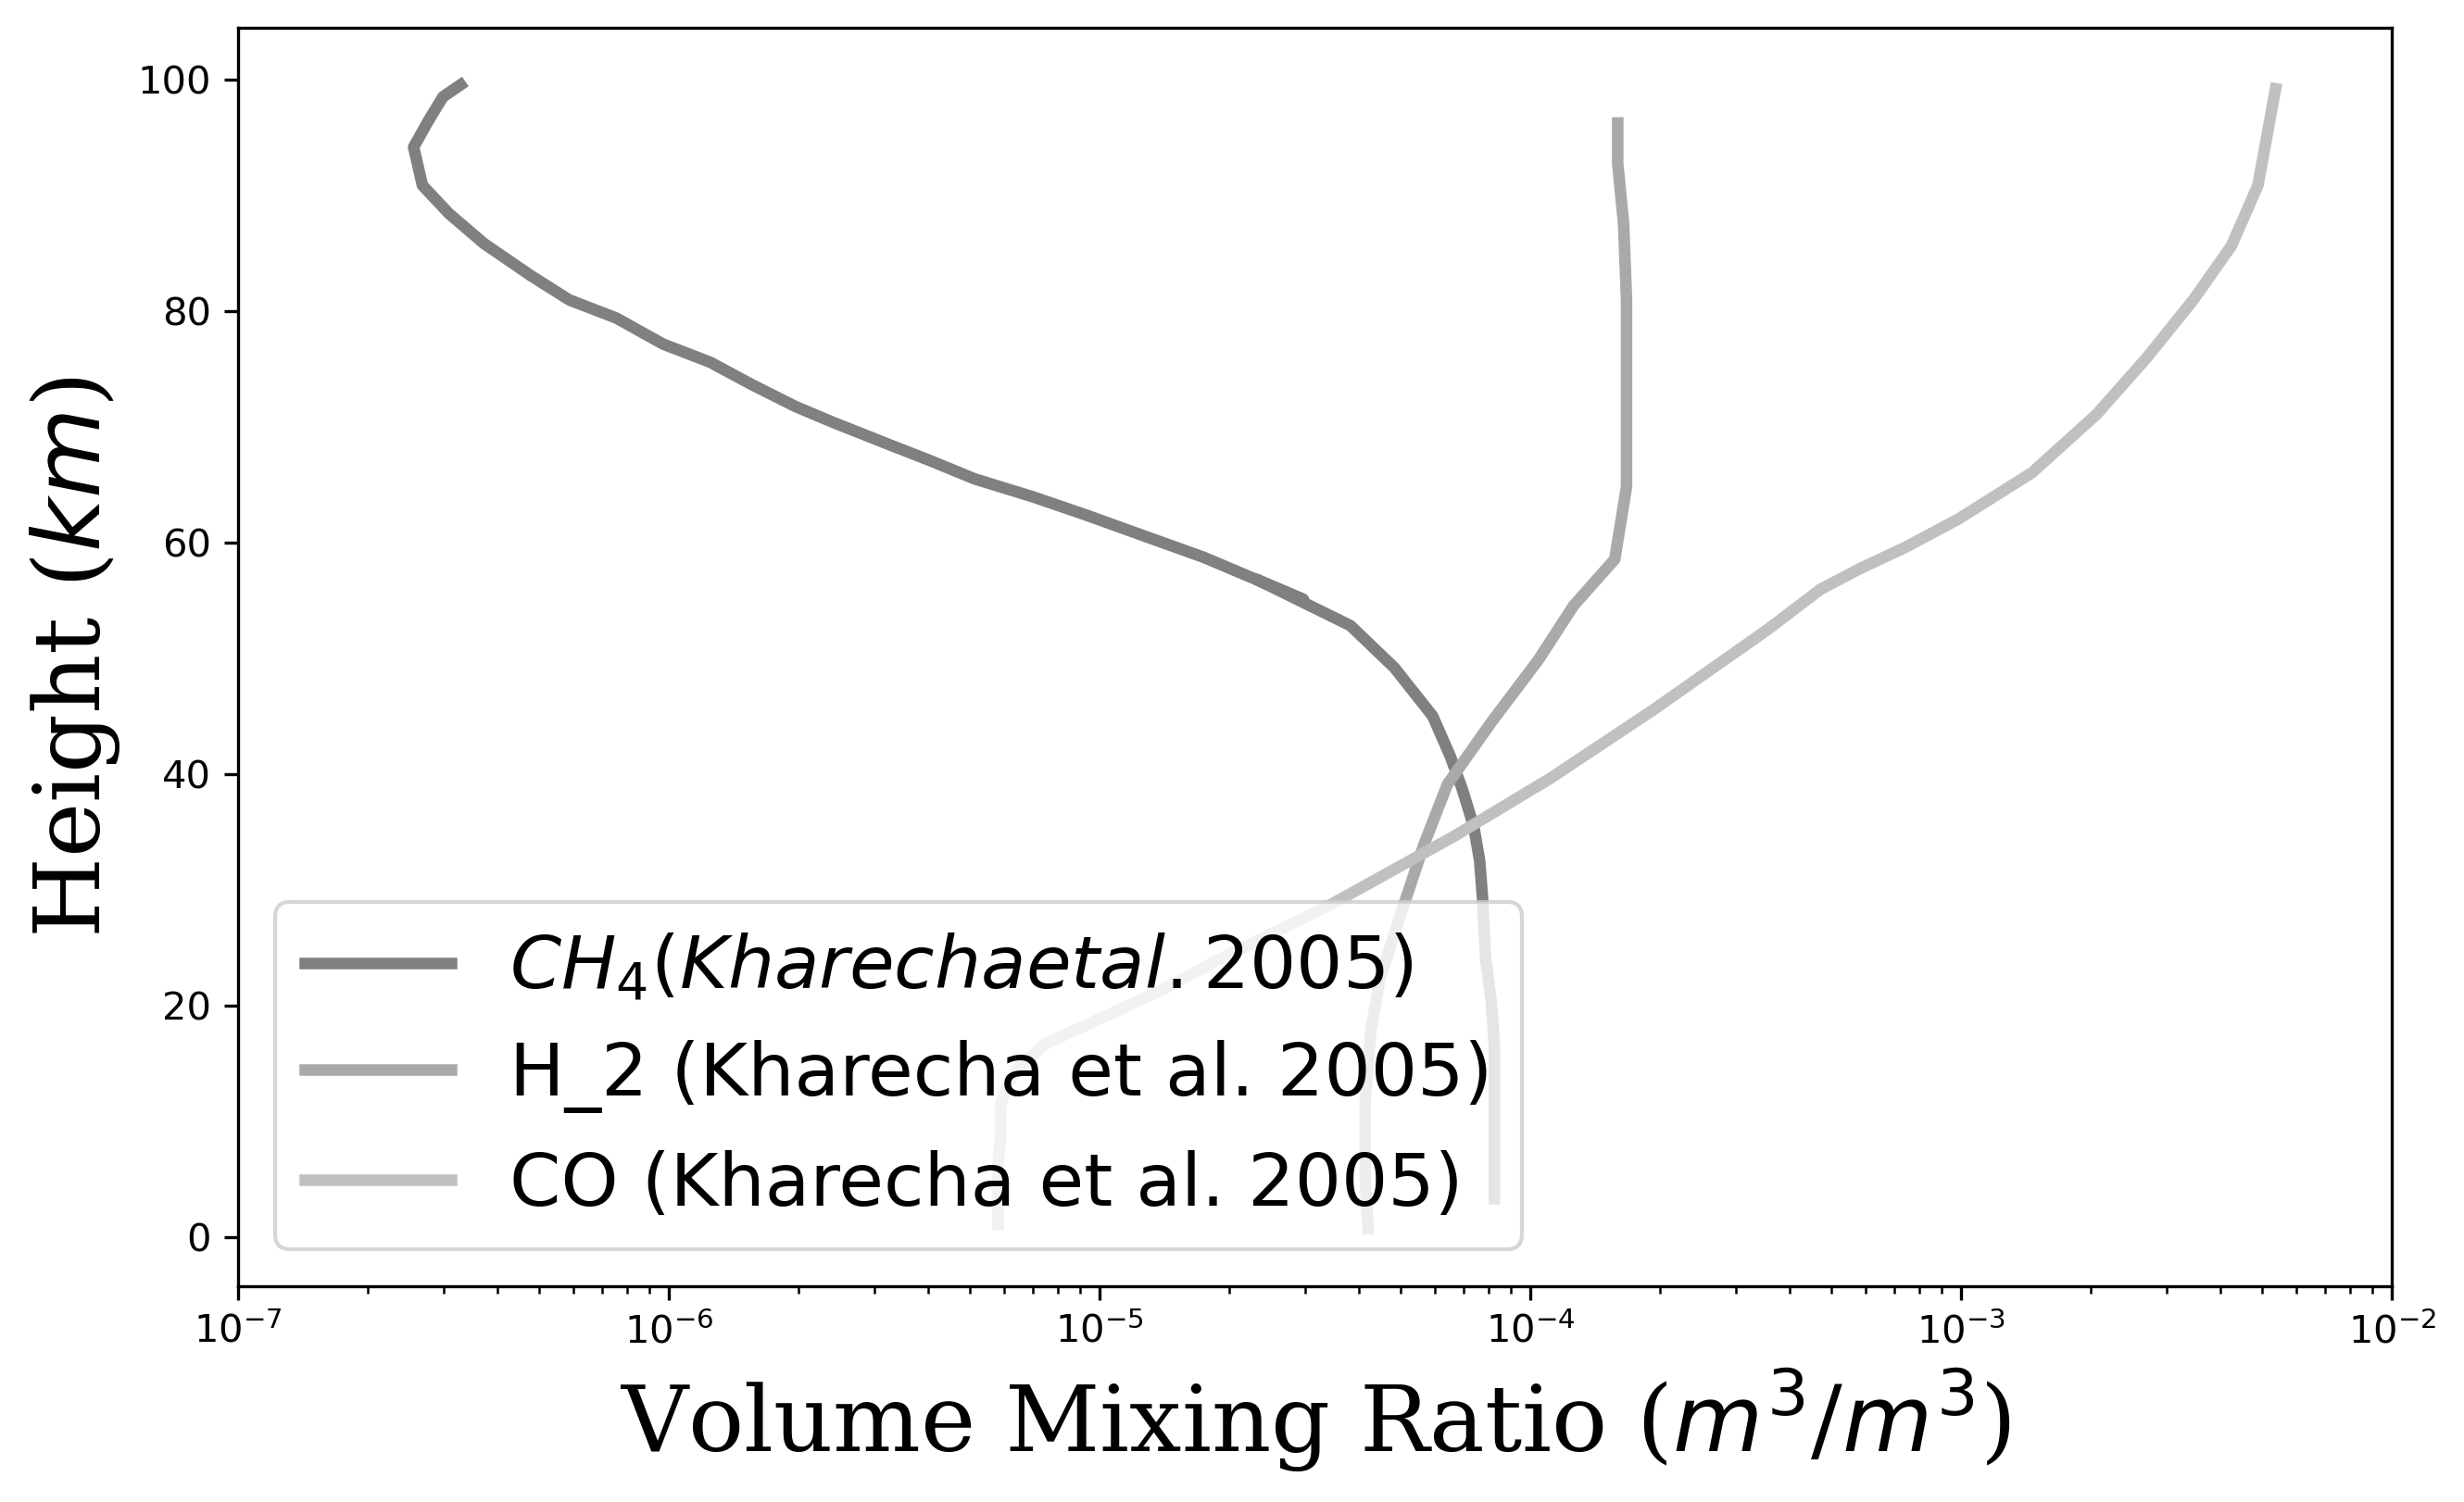

In [53]:
fig = plt.figure(figsize=(10, 6), dpi= 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)

ax.plot(kch4x,kch4y,color='gray', label=r'$CH_4 (Kharecha et al. 2005)$',linewidth=3)
ax.plot(kh2x,kh2y,color='darkgray', label = r'H_2 (Kharecha et al. 2005)', linewidth=3)
ax.plot(kcox,kcoy,color='silver',label = r'CO (Kharecha et al. 2005)',linewidth=3)
ax.set_xscale('log')

ax.set_xlim(xmin=1e-7,xmax=1e-2)
plt.xlabel(r'Volume Mixing Ratio ($m^3$/$m^3$)', fontname='Serif', fontsize=24)
plt.ylabel('Height ($km$)', fontname='serif', fontsize=24)

ax.legend(fontsize=19,loc='lower left')
#plt.savefig('archean_mr.jpg',bbox_inches='tight')
ax.plot()